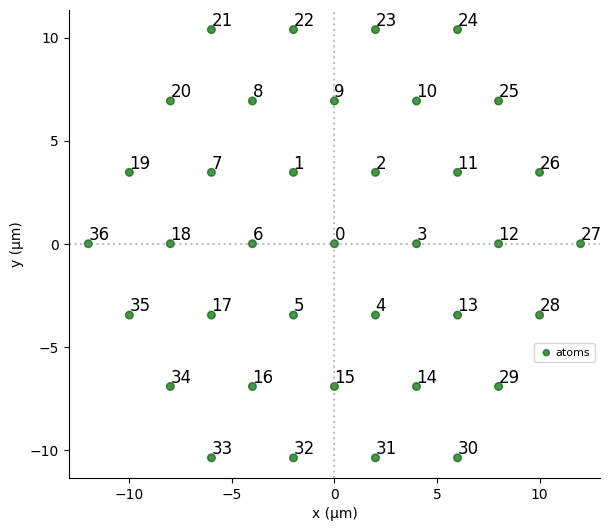

In [4]:
from pulser import Register
from pulser.devices import DigitalAnalogDevice

layers = 3
reg = Register.hexagon(layers)
reg.draw(with_labels=True)

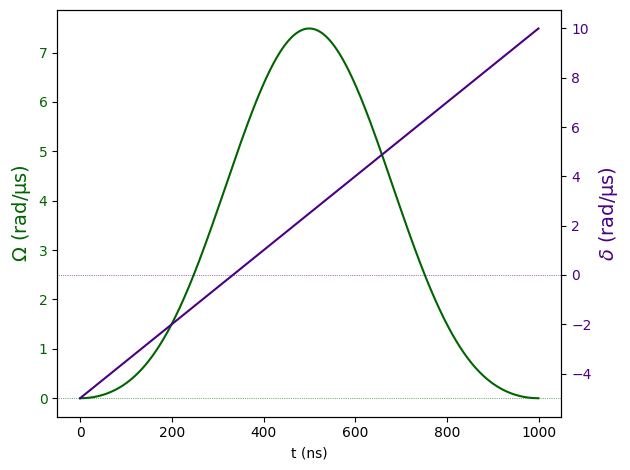

In [5]:
import numpy as np
from pulser import Pulse
from pulser.waveforms import RampWaveform, BlackmanWaveform

duration = 1000
pulse = Pulse(BlackmanWaveform(duration, np.pi), RampWaveform(duration, -5.0, 10.0), 0)
pulse.draw()

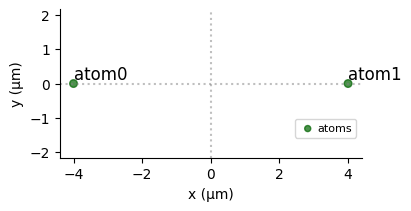

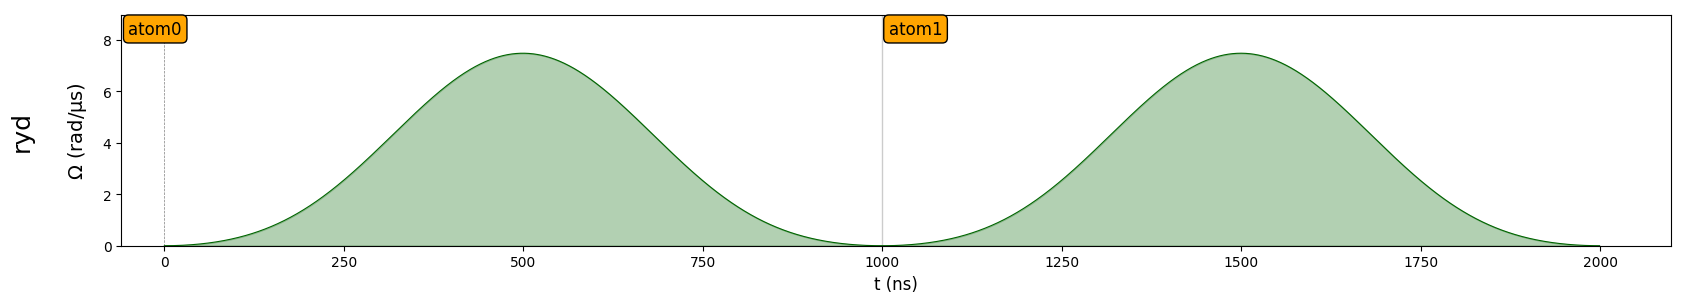

In [10]:
from pulser import Sequence

reg = Register.rectangle(1, 2, spacing=8, prefix='atom')
reg.draw()

pi_pulse = Pulse.ConstantDetuning(BlackmanWaveform(duration, np.pi), 0.0, 0.0)

seq = Sequence(reg, DigitalAnalogDevice)

seq.declare_channel('ryd', 'rydberg_local', 'atom0')

seq.add(pi_pulse, 'ryd')
seq.target('atom1', 'ryd')
seq.add(pi_pulse, 'ryd')

seq.draw()

In [15]:
import matplotlib.pyplot as plt
from pulser_simulation import QutipEmulator

data = []
distances = np.linspace(6.5, 14, 7)

r = [1, 0]
rr = np.kron(r, r)
occup = [np.outer(rr, np.conj(rr))]

for i, R in enumerate(distances):
    reg = Register.rectangle(1, 2, spacing=R, prefix='atom')

    seq = Sequence(reg, DigitalAnalogDevice)
    seq.declare_channel('ryd', 'rydberg_local', 'atom0')
    seq.add(pi_pulse, 'ryd')
    seq.target('atom1', 'ryd')
    seq.add(pi_pulse, 'ryd')

    sim = QutipEmulator.from_sequence(seq)

    res = sim.run()
    data.append(res.expect(occup)[0])

print('...Simulation Complete!')


...Simulation Complete!


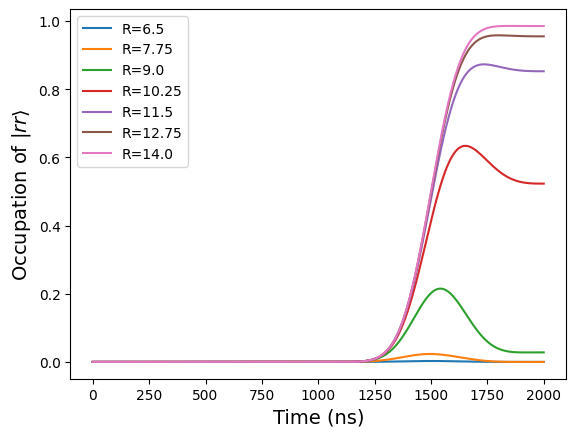

In [16]:
for i, R in enumerate(distances):
    plt.plot(data[i], label=f'R={R}')
    plt.xlabel('Time (ns)', fontsize=14)
    plt.ylabel(r'Occupation of $|rr\rangle$', fontsize=14)
    plt.legend()